# Lab 4: Data Cleaning

# Instructor: Li Zeng (lizeng@uw.edu)


Learning Objectives:

By the end of the lab, you will be able to:
1. Report missing values and deal with them.
2. Convert one datatype to another
3. Detect outliers and deal with them
4. Get clean text and extract required information
5. Use Regular Expressions

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
# Read from csv file
original_strava_df = pd.read_csv('strava_activity.csv')
# Let's make a copy of the original strava df and make sure we don't overwrite the original copy
strava_df = original_strava_df.copy()

### What does the data look like?

In [3]:
# What is the size of this dataset?
strava_df.shape

(8093, 53)

In [4]:
# A quick look at the raw data
strava_df.head()

,achievement_count,athlete.badge_type_id,athlete.city,athlete.country,athlete.premium,athlete.resource_state,athlete.sex,athlete.state,athlete_count,average_cadence,...,start_latlng,start_longitude,suffer_score,timezone,total_elevation_gain,total_photo_count,trainer,type,weighted_average_watts,workout_type
0,6,0,Quito,Ecuador,0,2,F,Pichincha,3,NaN,...,[-0.17 -78.49],-78.49,NaN,(GMT-05:00) America/Guayaquil,476.3,0,0,Ride,NaN,NaN
1,0,0,Oisterwijk,The Netherlands,0,2,M,NB,1,NaN,...,[38.68 0.09],0.09,NaN,(GMT+01:00) Europe/Madrid,456.9,0,0,Ride,NaN,0.0
2,8,0,Ypsilanti,United States,0,2,M,MI,2,NaN,...,[42.42 -83.96],-83.96,NaN,(GMT-05:00) America/Detroit,292.2,0,0,Ride,NaN,NaN
3,11,1,Harrogate,United Kingdom,1,2,F,England,2,NaN,...,[53.93 -1.82],-1.82,NaN,(GMT+00:00) Europe/London,1273.3,0,0,Ride,NaN,0.0
4,0,0,Alamo,United States,0,2,F,CA,1,NaN,...,[37.86 -121.97],-121.97,NaN,(GMT-08:00) America/Los_Angeles,166.6,0,0,Hike,NaN,NaN


In [5]:
# Examine the type of each variable
strava_df.dtypes

achievement_count           int64
athlete.badge_type_id       int64
athlete.city               object
athlete.country            object
athlete.premium             int64
athlete.resource_state      int64
athlete.sex                object
athlete.state              object
athlete_count               int64
average_cadence           float64
average_heartrate         float64
average_speed             float64
average_temp              float64
average_watts             float64
comment_count               int64
commute                     int64
device_watts              float64
distance                  float64
elapsed_time                int64
elev_high                 float64
elev_low                  float64
end_latlng                 object
flagged                     int64
gear_id                    object
has_heartrate             float64
has_kudoed                  int64
kilojoules                float64
kudos_count                 int64
location_city              object
location_count

In [6]:
# Check descriptive statistics of each column variable
strava_df.describe()

,achievement_count,athlete.badge_type_id,athlete.premium,athlete.resource_state,athlete_count,average_cadence,average_heartrate,average_speed,average_temp,average_watts,...,private,resource_state,start_latitude,start_longitude,suffer_score,total_elevation_gain,total_photo_count,trainer,weighted_average_watts,workout_type
count,8093.000000,8093.000000,8093.000000,8093.0,8093.000000,1666.000000,1929.000000,8093.000000,1528.000000,3884.000000,...,8093.0,8093.0,7432.000000,7432.000000,682.000000,8093.000000,8093.000000,8093.000000,309.000000,3486.000000
mean,3.841715,0.207093,0.203262,2.0,2.027555,77.380852,138.369311,4.776164,16.852094,129.217817,...,0.0,2.0,32.468071,-15.664773,71.890029,225.484765,0.076980,0.043989,182.323625,1.216007
std,8.710141,0.421686,0.402451,0.0,8.495287,16.753410,23.334950,23.155401,7.799240,54.808192,...,0.0,0.0,28.494918,77.450225,66.407220,645.911446,0.464648,0.205082,51.676492,3.104601
min,0.000000,0.000000,0.000000,2.0,1.000000,0.000000,0.000000,0.000000,-23.000000,0.000000,...,0.0,2.0,-46.400000,-158.060000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000
25%,0.000000,0.000000,0.000000,2.0,1.000000,73.300000,128.000000,2.647000,11.000000,92.200000,...,0.0,2.0,33.480000,-80.675000,30.000000,10.700000,0.000000,0.000000,148.000000,0.000000
50%,1.000000,0.000000,0.000000,2.0,1.000000,80.700000,141.700000,3.790000,17.000000,126.500000,...,0.0,2.0,42.350000,-2.160000,56.000000,63.700000,0.000000,0.000000,179.000000,0.000000
75%,4.000000,0.000000,0.000000,2.0,1.000000,85.900000,152.000000,6.379000,22.000000,161.125000,...,0.0,2.0,51.470000,7.705000,91.000000,246.600000,0.000000,0.000000,215.000000,0.000000
max,135.000000,4.000000,1.000000,2.0,424.000000,210.300000,199.200000,1888.900000,41.000000,506.600000,...,0.0,2.0,69.960000,176.390000,697.000000,19803.000000,11.000000,1.000000,330.000000,12.000000


### Deal with Missing Values

In [7]:
# You can detect how distinct values for a variable - set dropna = False to include missing value
strava_df['athlete.sex'].value_counts(dropna = False)

M      4084
F      3824
NaN     185
Name: athlete.sex, dtype: int64

In [8]:
# remove missing values
# when inplace = True, do operation inplace and return None
strava_df['athlete.sex'].dropna(axis=0, inplace=True)

In [9]:
# check again for missing value
strava_df['athlete.sex'].value_counts(dropna = False)

M    4084
F    3824
Name: athlete.sex, dtype: int64

In [10]:
# Alternatively, you can just count the number of missing values. Especially when you deal with numeric variables
pd.isnull(strava_df['suffer_score']).sum()

7411

In [11]:
# let's take a look at a small extract of this variable
strava_df['suffer_score'].iloc[10:20]

10    55.0
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: suffer_score, dtype: float64

In [12]:
# instead of removing missing values, you can fill missing values - data imputation
# for example, we can use median to replace missing values
value_to_fill = strava_df['suffer_score'].median() 
strava_df['suffer_score'].fillna(value = value_to_fill, axis = 0, inplace = True)
# Let's look at the data extract again
print(strava_df['suffer_score'].iloc[10:20])

10    55.0
11    56.0
12    56.0
13    56.0
14    56.0
15    56.0
16    56.0
17    56.0
18    56.0
19    56.0
Name: suffer_score, dtype: float64


### Correct Data Type

In [13]:
# Examine the data type of the variable "start_date"
strava_df['start_date'].head()

0    2014-08-27T20:55:26Z
1    2015-08-04T07:25:02Z
2    2015-05-17T18:38:04Z
3    2014-05-26T08:20:53Z
4    2013-12-19T17:05:16Z
Name: start_date, dtype: object

We can see the start_date is of type object

In [14]:
# Convert the object type to date 
strava_df['start_date'] = pd.to_datetime(strava_df['start_date'])

In [15]:
# Examine the result
strava_df['start_date'].head()

0   2014-08-27 20:55:26+00:00
1   2015-08-04 07:25:02+00:00
2   2015-05-17 18:38:04+00:00
3   2014-05-26 08:20:53+00:00
4   2013-12-19 17:05:16+00:00
Name: start_date, dtype: datetime64[ns, UTC]

The start date is now converted to datetime

### Detect Outliers

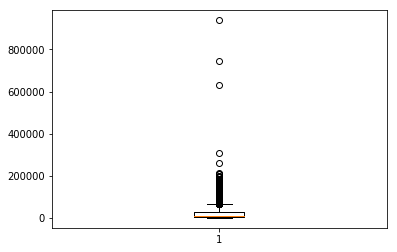

In [16]:
# Detecting Outliers using visualization
plt.boxplot(strava_df['distance'])
plt.show()

In [17]:
# Finding Interquartile range -  the difference between 75th and 25th quantiles
# lower quantile
Q1 = strava_df['distance'].quantile(0.25)
# upper quantile
Q3 = strava_df['distance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23904.6


In [18]:
# IQR Rule for Outliers
condition = (strava_df['distance'] < (Q1 - 1.5 * IQR)) |(strava_df['distance'] > (Q3 + 1.5 * IQR))
outliers = strava_df['distance'][condition]
outliers.shape

(565,)

In [20]:
# You can have a subset without the outlier
# But outliers are not errors so I don't recommend that you remove it from the dataset unless there is a good reason
strava_df['distance'][~condition]
# If you want to drop it
#strava_df['distance'].dropna(axis=0, inplace = True)
#strava_df.shape

0       21580.0
1       19092.8
2       23023.4
4        2739.8
5       13056.7
6       24438.8
7        9447.6
8           0.0
9        4814.0
10      33632.8
11      15818.6
12      16014.5
13       3157.1
14      10628.8
15      62910.9
16       5000.0
17      28765.1
19      32186.9
20      41926.3
21      43609.3
22      25781.1
23       8371.3
24      48415.5
25       6042.5
26      34499.3
27      21587.8
28      63273.8
29      54424.2
30      10122.0
31       6063.5
         ...   
8060    22881.0
8061     6124.9
8063    37085.1
8064    56494.4
8065    30373.0
8066     1786.8
8067    15114.6
8068    24143.9
8070      833.4
8071     6041.3
8072    38748.2
8073    24481.5
8074     8011.4
8075    22547.9
8076    21009.2
8077    30143.3
8078     6523.1
8079     2680.4
8080     3366.2
8081    54122.9
8082    33359.0
8084        0.0
8085     8155.3
8086     3218.7
8087     3521.8
8088    36105.8
8089    15747.0
8090    14904.3
8091     4638.6
8092    38714.9
Name: distance, Length: 

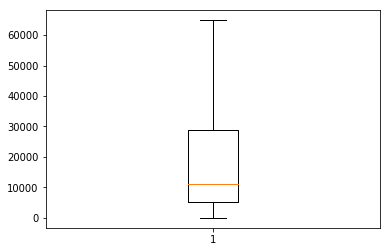

In [21]:
# to not show outliers in a boxplot - set showfliers = false
plt.boxplot(strava_df['distance'], showfliers = False)
plt.show()

The plot looks better now

### Text Cleaning

In [22]:
# Let's take a look at the end latitude/longitude data
strava_df['end_latlng'].head()

0     [-0.17 -78.49]
1       [38.68 0.09]
2     [42.42 -83.96]
3      [53.93 -1.82]
4    [37.86 -121.97]
Name: end_latlng, dtype: object

#### Let's start with using strip() for text cleaning

In [23]:
# Cleaning Text and extracting required information
# Extract end point latitude and longitude in separate columns
# First, let's get rid of the brackets
processed_latlng = strava_df['end_latlng'].str.strip('[').str.strip(']')
print(processed_latlng.head())

0     -0.17 -78.49
1       38.68 0.09
2     42.42 -83.96
3      53.93 -1.82
4    37.86 -121.97
Name: end_latlng, dtype: object


In [24]:
# The data is in a text format 
# We want to seperate lat and lng just as how the start lat/lng are stored in this dataset
end_lat, end_lng = processed_latlng.str.split(' ').str

In [25]:
strava_df['end_lat'] = pd.to_numeric(end_lat)
print(strava_df['end_lat'].head())

0    -0.17
1    38.68
2    42.42
3    53.93
4    37.86
Name: end_lat, dtype: float64


In [26]:
strava_df['end_lng'] = pd.to_numeric(end_lng)
print(strava_df['end_lng'].head())

0    -78.49
1      0.09
2    -83.96
3     -1.82
4   -121.97
Name: end_lng, dtype: float64


#### Now, let's try to clean the text using regular expressions!

In [27]:
def regex_func(x):
    if x == x:
        return re.findall(r"[\d\-\.]+", x)
    else:
        return [np.NaN, np.NaN]

In [28]:
end_lat, end_lng = strava_df['end_latlng'].apply(lambda x: regex_func(x)).str

In [29]:
strava_df['end_lat_2'] = pd.to_numeric(end_lat)
print(strava_df['end_lat_2'].head())

0    -0.17
1    38.68
2    42.42
3    53.93
4    37.86
Name: end_lat_2, dtype: float64


In [30]:
strava_df['end_lng_2'] = pd.to_numeric(end_lng)
print(strava_df['end_lng_2'].head())

0    -78.49
1      0.09
2    -83.96
3     -1.82
4   -121.97
Name: end_lng_2, dtype: float64


## Exercise

1. Report the number of missing values of countries of athletes.
2. Report the outliers of time elapsed. Can you reason why there may be outliers in this column?
3. Extract Time Zone without the location name. Eg: extract GMT+01:00 from (GMT+01:00) Europe/Amsterdam

In [49]:
# Let's try to do it using regular expressions!
def regex_func(x):
    if x == x:
        return re.search(r"\((.*)\)", x).group(1)
    else:
        return np.NaN

1. Report the number of missing values of countries of athletes.

In [42]:
print(strava_df['athlete.country'].value_counts(dropna=False))
print('Number of missing values for Country column:',sum(strava_df['athlete.country'].isnull()))

United States          2424
United Kingdom         1770
Australia               632
Canada                  249
France                  245
Brazil                  236
NaN                     200
Spain                   163
The Netherlands         133
Italy                   114
South Africa            107
Germany                 100
Norway                   79
New Zealand              76
Netherlands              73
Nederland                69
Italia                   68
Ireland                  64
España                   62
Deutschland              59
Portugal                 56
Belgium                  48
Norge                    47
Japan                    47
Thailand                 45
Switzerland              39
South Korea              36
Colombia                 35
Brasil                   35
Sweden                   35
                       ... 
Guam                      1
Storbritannien            1
Việt Nam                  1
Egypt                     1
영국                  

Number of mission values for the country column in strava dataset is 200

2. Report the outliers of time elapsed. Can you reason why there may be outliers in this column?

In [43]:
# Checking the data in the elapsed_time column
strava_df['elapsed_time'].head()

0     8697
1     5370
2     4409
3    20117
4     1682
Name: elapsed_time, dtype: int64

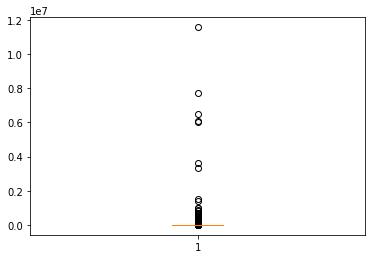

In [44]:
# Creating aboxplot for time elapsed column
plt.boxplot(strava_df['elapsed_time'])
plt.show()

In [ ]:
# Finding Interquartile range -  the difference between 75th and 25th quantiles
# lower quantile
Q1 = strava_df['elapsed_time'].quantile(0.25)
# upper quantile
Q3 = strava_df['elapsed_time'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [45]:
# IQR Rule for Outliers
condition = (strava_df['elapsed_time'] < (Q1 - 1.5 * IQR)) |(strava_df['elapsed_time'] > (Q3 + 1.5 * IQR))
outliers = strava_df['elapsed_time'][condition]
outliers.shape

(71,)

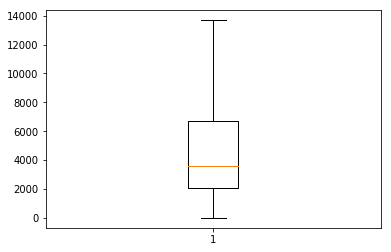

In [61]:
# to not show outliers in a boxplot - set showfliers = false
plt.boxplot(strava_df['elapsed_time'], showfliers = False)
plt.show()

In [47]:
#Printing Outlier values
outliers.values

array([  137935,   176919,  6475149,   810885,   100526,   260955,
          82961,   645896,    66991,    74037,   256361,   485906,
         621598,    88589,  6048240,    68581,   221622,   676954,
        6058298,   109897,   675679,   146993,   438671,    83505,
         153516,    82531,    85157,   164252,   388336,   239781,
         558520,   137053,  1005442,   161809,  1007715,   103267,
         107172,   259051,   173298,   180918,   175135,    98167,
         209016,    87557, 11575803,  1540912,   260955,    84010,
        1385969,   133348,  3632396,    96828,   199304,    74751,
        7726502,    81583,   418895,   108653,   891443,   528330,
         245630,   188267,   157838,   611244,   269830,   117943,
        3350544,   130646,   692808,   265667,    86783], dtype=int64)

Above list show all the 71 outliers for the time elapsed column in the strava dataset. These are those values which are higher than (Q3 + 1.5 * IQR) and less than (Q1 - 1.5 * IQR). 

The reason for outliers in this column is duw to the fact that athlets can have varying time elapsed values based on the activity they are participating in and hence it can show a wide range of values for this columns. It can also be due to the fact that not same number of people will be participating in all the activites which can lead to a subset of smaller or higher values based on the time of activity. Outliers can sometimes be present due to human error in entry as well in which case it is more advisable to either remove them or replace them with the average value or other other method to fix the incorrect entry.

3. Extract Time Zone without the location name. Eg: extract GMT+01:00 from (GMT+01:00) Europe/Amsterdam

In [54]:
#Extracting time zone without the location name
time_zone = strava_df['timezone'].apply(lambda x: regex_func(x))
time_zone

0       GMT-05:00
1       GMT+01:00
2       GMT-05:00
3       GMT+00:00
4       GMT-08:00
5       GMT+00:00
6       GMT+02:00
7       GMT-05:00
8       GMT+00:00
9       GMT+00:00
10      GMT+00:00
11      GMT+00:00
12      GMT-08:00
13      GMT+00:00
14      GMT+10:00
15      GMT+01:00
16      GMT+08:00
17      GMT+00:00
18      GMT+10:00
19      GMT-07:00
20      GMT-06:00
21      GMT-05:00
22      GMT+01:00
23      GMT-08:00
24      GMT-07:00
25      GMT-05:00
26      GMT+00:00
27      GMT+02:00
28      GMT+01:00
29      GMT+01:00
          ...    
8063    GMT-08:00
8064    GMT+01:00
8065    GMT+01:00
8066    GMT-08:00
8067    GMT+02:00
8068    GMT+00:00
8069    GMT-06:00
8070    GMT-05:00
8071    GMT-08:00
8072    GMT+00:00
8073    GMT-07:00
8074    GMT+01:00
8075    GMT+09:30
8076    GMT+04:00
8077    GMT+01:00
8078    GMT+10:00
8079    GMT+00:00
8080    GMT+00:00
8081    GMT+12:00
8082    GMT+10:00
8083    GMT-05:00
8084    GMT-05:00
8085    GMT+00:00
8086    GMT-05:00
8087    GM

The above shows are the timezones extracted without location name using the regex_function above.